# Paper Section: Fig of the fine grain extrapolation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path

import sklearn
import numpy as np
import pandas as pd
from glob import glob

from sklearn import metrics
from math import sqrt

import matplotlib
import matplotlib.pyplot as plt

# Make all python scripts available in the path
sys.path.append('../')

import pp_utils
import lrn_crv_plot
%matplotlib inline

filepath = Path(os.getcwd())
print(filepath)

/vol/ml/apartin/projects/LearningCurves/notebooks


In [2]:
from fit import * # weighted_power_law, fit_weighted_pwr_law
import rpy2.robjects as robjects

In [3]:
save_fig_path = filepath/'figs/fine_grain'
os.makedirs(save_fig_path, exist_ok=True)

def save_fig(save_fig_path, fname):    
    # plt.savefig(save_fig_path/(fname + '.eps'), format='eps')
    plt.savefig(save_fig_path/(fname + '.png'), dpi=200)

In [4]:
def calc_gof(y, yfit):
    gof = {}
    rmse = sqrt( metrics.mean_squared_error(y, yfit) )
    mae = metrics.mean_absolute_error(y, yfit)
    gof['rmse'] = rmse
    gof['mae'] = mae
    return gof

In [5]:
# Set Y axis
def set_yticks_ap(ax, ylim=None):
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if (ylim is None):
        ylim = ax.get_ylim()
    ylim_log = np.log2(ylim)
    ylabels_log = np.logspace(ylim_log[0], ylim_log[1], num=5, base=2)
    ylabels_log = np.around(ylabels_log, decimals=3)
    ax.set_yticks(ylabels_log)
    return ax

In [6]:
figsize = (6, 4.5)
metric_name = 'mean_absolute_error'
tr_set = 'te'

plot_args = {'metric_name': metric_name, 'xtick_scale': 'log2', 'ytick_scale': 'log2', 'figsize': figsize}

### Get dir path of all runs

In [7]:
src = 'gdsc'
base_dir = Path('/vol/ml/apartin/projects/LearningCurves/trn.gdsc/split_on_none/fine_grain_lgb')
scores = pd.read_csv(base_dir/'scores.csv')

# Get all run dirs
runs = glob(str(base_dir/'*'))

### Aggregate results over runs

In [8]:
# scores = []
# for i, r in enumerate(runs):
#     dpath = Path(r)/'lrn_crv_scores.csv'
#     if not dpath.exists(): continue
        
#     scr_tmp = pd.read_csv( dpath )
#     scr_tmp.rename(columns={'fold0': 'run'+str(i+1)}, inplace=True)
#     if len(scores)==0:
#         scores = scr_tmp
#     else:
#         scores = scores.merge(scr_tmp, on=['metric', 'tr_size', 'set'])
        
# run_col_names = [c for c in scores.columns if 'run' in c]

# scores_mean   = scores[run_col_names].mean(axis=1)
# scores_median = scores[run_col_names].median(axis=1)
# scores_std    = scores[run_col_names].std(axis=1)

# scores.insert(loc=3, column='mean', value=scores_mean)
# scores.insert(loc=3, column='median', value=scores_median)
# scores.insert(loc=3, column='std', value=scores_std)
# print(len(np.unique(scores.tr_size)))

# display(scores[:2])
# print('Training set sizes:', np.unique(scores.tr_size))

# save = True
# if save:
#     scores.to_csv(base_dir/'all_seed_runs_scores.csv', index=False)

In [9]:
# scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True).iloc[:, :6]
# scores_te.to_csv(base_dir/'scores.csv', index=False)

In [10]:
# scores = []
# prf = 'id'
# for i, r in enumerate(runs):
#     # scr_tmp = pd.read_csv( Path(r)/'lrn_crv_scores.csv' )
#     dpath = Path(r)/'lrn_crv_scores.csv'
#     if not dpath.exists():
#         continue
        
#     scr_tmp = pd.read_csv( dpath )
#     scr_tmp.rename(columns={'fold0': prf+str(i)}, inplace=True)
#     if len(scores)==0:
#         scores = scr_tmp
#     else:
#         scores = scores.merge(scr_tmp, on=['metric', 'tr_size', 'set'])
        
# run_col_names = [c for c in scores.columns if prf in c]

# scores_mean   = scores[run_col_names].mean(axis=1)
# scores_median = scores[run_col_names].median(axis=1)
# scores_std    = scores[run_col_names].std(axis=1)
# # scores_iqr    = iqr(scores.iloc[:, 6:].values, axis=0)

# scores.insert(loc=3, column='mean', value=scores_mean)
# scores.insert(loc=3, column='median', value=scores_median)
# scores.insert(loc=3, column='std', value=scores_std)
# print(len(np.unique(scores.tr_size)))

# # display(scores[:2])
# print('Training set sizes:', np.unique(scores.tr_size))

# # scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True).iloc[:, :6]
# scores_te = scores[(scores.metric=='mean_absolute_error') & (scores.set=='te')].reset_index(drop=True)

# save = True
# if save:
#     scores.to_csv(base_dir/'all_seed_runs_scores.csv', index=False)
#     scores_te.to_csv(base_dir/'scores.csv', index=False)

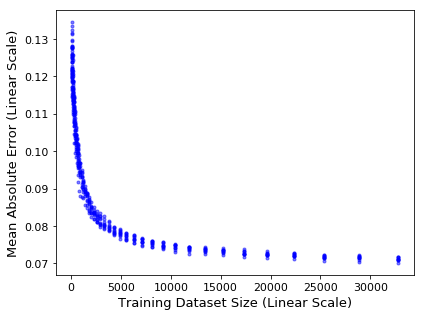

In [11]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'linear', 'ytick_scale': 'linear'}

shift_idx = 0
ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shift_idx, **plot_args );

ax.tick_params(axis='both', labelsize=11)
ax.grid(False)
plt.tight_layout()
# plt.savefig(base_dir/(f'{src}_all_runs_linlin.png'), dpi=200)

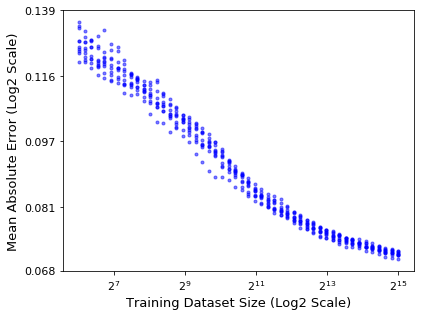

In [12]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'log2', 'ytick_scale': 'log2'}

ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shift_idx, **plot_args );

# General axes prms
ax.tick_params(axis='both', labelsize=11)

# Set Y axis
ax = set_yticks_ap(ax)

ax.grid(False)
plt.tight_layout()
# plt.savefig(base_dir/(f'{src}_all_runs_loglog.png'), dpi=200)

In [13]:
# figsize = (6, 4.5)
# metric_name = 'mean_absolute_error'
# tr_set = 'te'

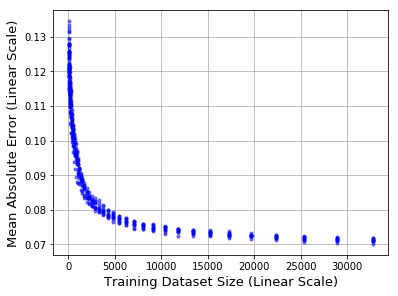

In [14]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'linear', 'ytick_scale': 'linear'}
shard_min_idx=0
# shard_min_idx=1

ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shard_min_idx, **plot_args );
# plt.savefig(save_fig_path/f'{src}_all_runs_linlin.png')

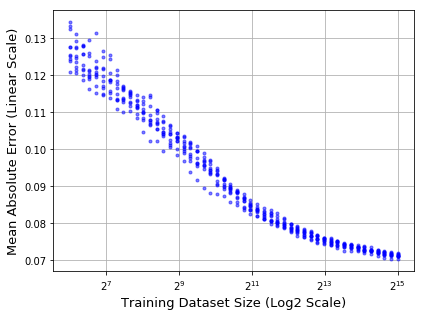

In [15]:
plot_args = {'tr_set': tr_set, 'metric_name': metric_name, 'figsize': figsize, 'xtick_scale': 'log2', 'ytick_scale': 'linear'}
shard_min_idx=0
# shard_min_idx=1

ax = pp_utils.plot_lc_multi_runs( runs, shard_min_idx=shard_min_idx, **plot_args );
plt.tight_layout()
# plt.savefig(save_fig_path/f'{src}_all_runs_loglog.png')
# save_fig(save_fig_path, fname=f'{src}_all_runs_loglog')

In [16]:
figsize = (6, 4.5)
metric_name = 'mean_absolute_error'
xtick_scale, ytick_scale = 'log2', 'log2'

plot_args = {'metric_name': metric_name, 'xtick_scale': xtick_scale, 'ytick_scale': ytick_scale, 'figsize': figsize}

In [17]:
shift_id = 0
shift_id_end = 37
# scr = scores_te[shift_id:].reset_index(drop=True)
scr = scores[shift_id:shift_id_end].reset_index(drop=True)
y_col_name = 'median'

In [18]:
# scores_te = scores[ (scores['metric']==metric_name) & (scores['set']=='te') ].reset_index(drop=True)

# shard_min_idx=0
# # shard_min_idx=1

# ax = None
# ax = lrn_crv_plot.plot_lrn_crv_new(
#         x=scores_te['tr_size'][shard_min_idx:], y=scores_te['median'][shard_min_idx:], yerr=scores_te['std'][shard_min_idx:],
#         ax=ax, ls='--', marker='.', alpha=1,
#         **plot_args, label='Median and STD')

# ax.legend(frameon=True, fontsize=10, loc='best');
# plt.tight_layout()
# # plt.savefig(save_fig_path/f'{src}_agg_median_std.png')

GOF: {'rmse': 0.0017748728720523878, 'mae': 0.0012616313986040764}


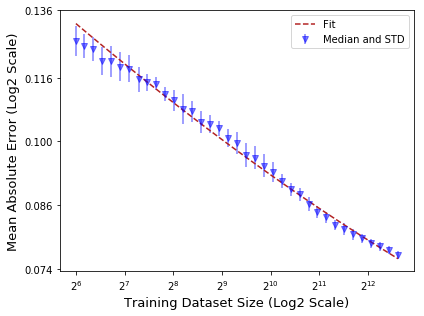

In [19]:
x = scr['tr_size'].values
y = scr[y_col_name].values
yerr = scr['std'].values

shard_min_idx = 0
xf = x[shard_min_idx:]
yf = y[shard_min_idx:]
prms = fit_params(xf, yf)
yfit = biased_powerlaw(xf, **prms)

ax = None

# Median values
ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, yerr=yerr,
                                   ax=ax, ls='', marker='v', alpha=0.5,
                                   **plot_args, color='b', label='Median and STD')
# Fit
ax = lrn_crv_plot.plot_lrn_crv_new(x=xf, y=yfit,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, color='firebrick', label='Fit')
gof = calc_gof(yf, yfit)

ax = set_yticks_ap(ax)
ax.legend(frameon=True, fontsize=10, loc='best')
plt.tight_layout()
ax.grid(False)

# save_fig(save_fig_path, fname=f'{src}_agg_median_std_fit_all')
print('GOF:', gof)

In [20]:
x = scr['tr_size'].values
y = scr[y_col_name].values
yerr = scr['std'].values

# Fit
shard_min_id = 5
shard_max_id = 15
xf = x[shard_min_id : shard_max_id]
yf = y[shard_min_id : shard_max_id]
prms = fit_params(xf, yf)
yfit = biased_powerlaw(xf, **prms)

Range of m used to fit:  [120 137 156 177 201 228 259 294 334 380]
Extrap point x_ext1:  2916
Extrap point x_ext2:  5512


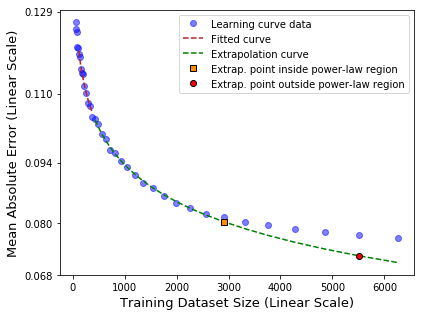

In [32]:
plot_args['xtick_scale'], plot_args['ytick_scale'] = 'linear', 'linear'
# plot_args['xtick_scale'], plot_args['ytick_scale'] = 'log2', 'log2'

ax = None

# Median values
ax = lrn_crv_plot.plot_lrn_crv_new(x=x, y=y, # yerr=yerr,
                                   ax=ax, ls='', marker='o', alpha=0.5,
                                   **plot_args, color='b', label='Learning curve data')
# Fit
ax = lrn_crv_plot.plot_lrn_crv_new(x=xf, y=yfit,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, color='firebrick', label='Fitted curve')
# Extrapolation cuvre
xf_ = x[shard_max_id:]
# yf_ = y[shard_max_idx:]
yfit_ = biased_powerlaw(xf_, **prms)
ax = lrn_crv_plot.plot_lrn_crv_new(x=xf_, y=yfit_,
                                   ax=ax, ls='--', marker='', alpha=1,
                                   **plot_args, color='g', label='Extrapolation curve')

# Extrapolation points
x_id_ext1 = shard_max_id + 15
x_id_ext2 = shard_max_id + 20
x_ext1 = x[x_id_ext1]
x_ext2 = x[x_id_ext2]
y_ext1 = biased_powerlaw(x_ext1, **prms)
y_ext2 = biased_powerlaw(x_ext2, **prms)
ax.plot(x_ext1, y_ext1, 's', color='darkorange', markeredgecolor='k', alpha=1,
        label='Extrap. point inside power-law region')  # darkviolet
ax.plot(x_ext2, y_ext2, 'o', color='r', markeredgecolor='k', alpha=1,
        label='Extrap. point outside power-law region')

print('Range of m used to fit: ', xf)
print('Extrap point x_ext1: ', x_ext1)
print('Extrap point x_ext2: ', x_ext2)

# print('GOF for extrap 1', calc_gof(yf, y_ext1))
# gof = calc_gof(yf, yfit)
# gof = calc_gof(yf, yfit)

ax = set_yticks_ap(ax)
ax.legend(frameon=True, fontsize=10, loc='best')
plt.tight_layout()
ax.grid(False)

# save_fig(save_fig_path, fname=f'{src}fine_grain_extrap_{xtick_scale}')
plt.savefig(base_dir/'fine_grain_extrp_{}.png'.format(plot_args['xtick_scale']), dpi=200)